### **Building, Training, and Evaluating Machine Learning Models**

In [14]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
# Load the file
df = pd.read_csv('processed_data.csv')

In [20]:
df.head()

label                                               text  \
0  Psoriasis  I have been experiencing a skin rash on my arm...   
1  Psoriasis  My skin has been peeling, especially on my kne...   
2  Psoriasis  I have been experiencing joint pain in my fing...   
3  Psoriasis  There is a silver like dusting on my skin, esp...   
4  Psoriasis  My nails have small dents or pits in them, and...   

   description_length  word_count  \
0                 141          28   
1                 138          23   
2                 148          28   
3                 164          32   
4                 140          27   

                                   preprocessed_text  Label_encoded  
0  experiencing skin rash arm leg torso past week...             15  
1  skin peeling especially knee elbow scalp peeli...             15  
2  experiencing joint pain finger wrist knee pain...             15  
3  silver like dusting skin especially lower back...             15  
4  nail small dent pit often feel inflammatory te...             15

In [6]:
df.shape

(1153, 6)

In [7]:
df.columns

Index(['label', 'text', 'description_length', 'word_count',
       'preprocessed_text', 'Label_encoded'],
      dtype='object')

In [16]:
# Split the data into training and testing sets 
X = df['preprocessed_text']
y = df['Label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Load the saved LabelEncoder
encoder = joblib.load('label_encoder.pkl')


In [6]:
# Create dictionary to map encoded labels to original names
label_mapping = {idx: label for idx, label in enumerate(encoder.classes_)}

# Print the mapping
for encoded_label, original_name in label_mapping.items():
    print(f'Encoded Label: {encoded_label}, Original Name: {original_name}')
    

Encoded Label: 0, Original Name: Acne
Encoded Label: 1, Original Name: Arthritis
Encoded Label: 2, Original Name: Bronchial Asthma
Encoded Label: 3, Original Name: Cervical spondylosis
Encoded Label: 4, Original Name: Chicken pox
Encoded Label: 5, Original Name: Common Cold
Encoded Label: 6, Original Name: Dengue
Encoded Label: 7, Original Name: Dimorphic Hemorrhoids
Encoded Label: 8, Original Name: Fungal infection
Encoded Label: 9, Original Name: Hypertension
Encoded Label: 10, Original Name: Impetigo
Encoded Label: 11, Original Name: Jaundice
Encoded Label: 12, Original Name: Malaria
Encoded Label: 13, Original Name: Migraine
Encoded Label: 14, Original Name: Pneumonia
Encoded Label: 15, Original Name: Psoriasis
Encoded Label: 16, Original Name: Typhoid
Encoded Label: 17, Original Name: Varicose Veins
Encoded Label: 18, Original Name: allergy
Encoded Label: 19, Original Name: diabetes
Encoded Label: 20, Original Name: drug reaction
Encoded Label: 21, Original Name: gastroesophageal 

#### Train and Test LinearSVC and RandomForest Classifier Models with CountVectorizer

In [18]:
# Vectorize text using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)  # limiting to 5000 features

X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()


In [19]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)


In [20]:
# Use a single function to train and evaluate 2 models - LinearSVC and RandomForest
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Print the model name
    print(str(model.__class__.__name__))
    
    # Display the confusion matrix, classification report, and accuracy score
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nAccuracy Score:", accuracy_score(y_test, predictions))
    print("------------------------------------------------------\n")


In [21]:
# Initialize the models
svm_model = LinearSVC(C=0.1, dual=False, max_iter=5000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)


In [22]:
# Train and evaluate the models
models = [svm_model, rf_model]
model_predictions = {}

for model in models:
    train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)


LinearSVC
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  9  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  

#### Train and Test LinearSVC and RandomForest Classifier Models using Word2Vec

In [53]:
# Vectorize text using Word2Vec 
import gensim
from gensim.models import Word2Vec

# Tokenize the texts
tokenized_texts = df['preprocessed_text'].apply(lambda x: x.split())


In [ ]:
# Train the Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.save("word2vec.model")


In [54]:
def text_to_vector(text, model):
    """Convert text to its vector representation."""
    words = text.split()
    vector = np.zeros(model.vector_size)
    word_count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            word_count += 1
    if word_count != 0:
        vector /= word_count
    return vector

# Convert texts to their vector representations
X_train_w2v = X_train.apply(lambda x: text_to_vector(x, w2v_model))
X_test_w2v = X_test.apply(lambda x: text_to_vector(x, w2v_model))

X_train_w2v = np.array(X_train_w2v.tolist())
X_test_w2v = np.array(X_test_w2v.tolist())


In [55]:
# Train and evaluate models:
for model in models:
    train_and_evaluate(model, X_train_w2v, y_train, X_test_w2v, y_test)
    

LinearSVC
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0]
 [ 2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  3  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  2  0  0  0]
 [ 7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  3  0  0  0]
 [ 5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  2  0  0  0]
 [ 5  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

C:\Users\CFS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CFS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CFS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  1  0  1  0  2  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  1  2  0  0  0  1  0  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 10  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  6  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  3  0  5  0  0  0  0  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0 

#### Train and Test LinearSVC and RandomForest Classifier Models using TfidfVectorizer

In [ ]:
# Vectorize text using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Print the model name
    print(str(model.__class__.__name__))
    
    # Display the confusion matrix, classification report, and accuracy score
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nAccuracy Score:", accuracy_score(y_test, predictions))
    print("------------------------------------------------------\n")
    

In [ ]:
# Use TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()


In [ ]:
# Scale again
scaler = StandardScaler()
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)


In [ ]:
# Initialize the models
svm_model = LinearSVC(C=0.1, dual=False, max_iter=5000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)


In [19]:
# Train and evaluate the models using TF-IDF features
models = [svm_model, rf_model]

for model in models:
    train_and_evaluate(model, X_train_tfidf_scaled, y_train, X_test_tfidf_scaled, y_test)


LinearSVC
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  

##### Observation
##### Based on the training and testing of various models across different vectorizers, it's evident that both models consistently yield superior results when paired with the CountVectorizer. As a result, I will proceed with hyperparameter tuning using the CountVectorizer features.

#### Hyperparameter Tuning - CountVectorizer

In [ ]:
# Hyperparameter tuning for both models using CountVectorizer, due to its superior performance.

from sklearn.model_selection import GridSearchCV

# Function to perform hyperparameter tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(str(model.__class__.__name__))
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-validation Score:", grid_search.best_score_)
    print("------------------------------------------------------\n")
    return grid_search.best_estimator_


In [ ]:
# Parameters for LinearSVC
svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

# Parameters for RandomForest
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Hyperparameter tuning
best_svm_model = hyperparameter_tuning(svm_model, svm_params, X_train_scaled, y_train)
best_rf_model = hyperparameter_tuning(rf_model, rf_params, X_train_scaled, y_train)


In [22]:
# Train and evaluate your models using the best parameters:
models = [best_svm_model, best_rf_model]

for model in models:
    train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
LinearSVC
Best Parameters: {'C': 0.001, 'max_iter': 1000}
Best Cross-validation Score: 0.9479670975323149
------------------------------------------------------

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
RandomForestClassifier
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.9533725029377204
------------------------------------------------------

LinearSVC
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 

#### Instantiate Models Using Optimal Parameters

In [23]:
# Function to train and evaluate the best models using the best parameters
def train_and_evaluate_best(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Print the model name
    print(str(model.__class__.__name__))
        
    # Display the confusion matrix, classification report, and accuracy score
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nAccuracy Score:", accuracy_score(y_test, predictions))
    print("------------------------------------------------------\n")
    

In [24]:
# Initialize the best models with optimized parameters
best_svm_model = LinearSVC(C=0.001, max_iter=1000, dual=False, random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)


In [25]:
# Train and evaluate the best models
best_models = [best_svm_model, best_rf_model]

for model in best_models:
    train_and_evaluate_best(model, X_train_scaled, y_train, X_test_scaled, y_test)


LinearSVC
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  

#### In-Depth Model Analysis and Interpretation

##### 1. Positive and negative features of LinearSVC

In [56]:
# Get the top 10 positive and negative features in each class - disease
feature_names = vectorizer.get_feature_names_out()
coef = best_svm_model.coef_

# For each class, print the top terms
for i, class_label in enumerate(encoder.classes_):  # encoder is the LabelEncoder 
    top_positive_coef = np.argsort(coef[i])[-10:][::-1]  # Top 10 terms with positive coefficients
    top_negative_coef = np.argsort(coef[i])[:10]  # Top 10 terms with negative coefficients
    
    print(f"Class {class_label}:")
    print("Most Indicative Terms:", [feature_names[j] for j in top_positive_coef])
    print("Least Indicative Terms:", [feature_names[j] for j in top_negative_coef])
    print("-" * 50)


Class 0:
Most Indicative Terms: ['blackhead', 'pu', 'filled', 'pimple', 'scurrying', 'scurring', 'morning', 'packed', 'skin', 'sensitive']
Least Indicative Terms: ['hue', 'went', 'resemble', 'spreading', 'altered', 'different', 'knot', 'tone', 'firm', 'pressured']
--------------------------------------------------
Class 1:
Most Indicative Terms: ['walking', 'stiff', 'joint', 'without', 'move', 'stiffness', 'walk', 'tight', 'muscle', 'neck']
Least Indicative Terms: ['pain', 'back', 'daily', 'bleeding', 'cough', 'apetite', 'hurt', 'wrist', 'activity', 'anus']
--------------------------------------------------
Class 2:
Most Indicative Terms: ['mucoid', 'producing', 'thick', 'sputum', 'cough', 'roof', 'breathing', 'shallow', 'saliva', 'hey']
Least Indicative Terms: ['heart', 'generally', 'asthma', 'racing', 'hurt', 'chilly', 'throat', 'brownish', 'sweating', 'cold']
--------------------------------------------------
Class 3:
Most Indicative Terms: ['limb', 'weakness', 'back', 'neck', 'bala

##### 2. Top 25 most important features of Random Forest Classifier

In [57]:
# Get the top 25 most important features for each disease
importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print the top 25 features
print("Top 25 Important Features:")
for i in range(25):
    print(f"{feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]}")


Top 25 Important Features:
skin: 0.014874509112413377
neck: 0.014851878585103295
anus: 0.014760818308024112
headache: 0.014074034887979156
cough: 0.01339678945150843
chest: 0.01287593621832134
fever: 0.012713890492872724
pain: 0.012503079887390769
throat: 0.010879486575734811
muscle: 0.010652224277729804
pee: 0.010237945545799827
blackhead: 0.009821258015718622
back: 0.00968182232723599
joint: 0.00959301798919333
leg: 0.009540584860528913
chill: 0.009452251417984467
yellow: 0.008898531031210665
pu: 0.008680102934972707
high: 0.008654727672881437
sore: 0.008619597459650264
lot: 0.008446076109457707
pimple: 0.008261976413935706
weight: 0.008083030122334646
nose: 0.007923865770480841
heart: 0.007645240405249171


##### Cross-Validation and Score Visualization for both Models

In [ ]:
# Store cross-validation results
scores_data = {}
mean_scores = {}
std_scores = {}


In [ ]:
# Function to save scores
def cross_validate_best_model(model, X, y, cv=10):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    model_name = str(model.__class__.__name__)
    
    # Save CV scores, mean, and std
    scores_data[model_name] = cv_scores
    mean_scores[model_name] = cv_scores.mean()
    std_scores[model_name] = cv_scores.std()
    
    print(model_name)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    print("Standard deviation of CV accuracy:", cv_scores.std())
    print("------------------------------------------------------\n")
    

In [ ]:
# Conduct cross-validation for the best models
best_models = [best_svm_model, best_rf_model]

for model in best_models:
    cross_validate_best_model(model, X_train_scaled, y_train)


In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=list(scores_data.values()))
plt.xticks(range(len(scores_data)), scores_data.keys())
plt.ylabel('Accuracy')
plt.title('Box Plot of Cross-Validation Scores')
plt.show()


LinearSVC
Cross-validation scores: [0.97849462 0.93548387 0.90217391 0.95652174 0.92391304 0.93478261
 0.94565217 0.97826087 0.9673913  0.9673913 ]
Mean CV accuracy: 0.9490065451145394
Standard deviation of CV accuracy: 0.02382698743214495
------------------------------------------------------

RandomForestClassifier
Cross-validation scores: [0.97849462 0.95698925 0.90217391 0.97826087 0.91304348 0.97826087
 0.93478261 0.95652174 0.9673913  0.9673913 ]
Mean CV accuracy: 0.9533309957924263
Standard deviation of CV accuracy: 0.026228471988682497
------------------------------------------------------



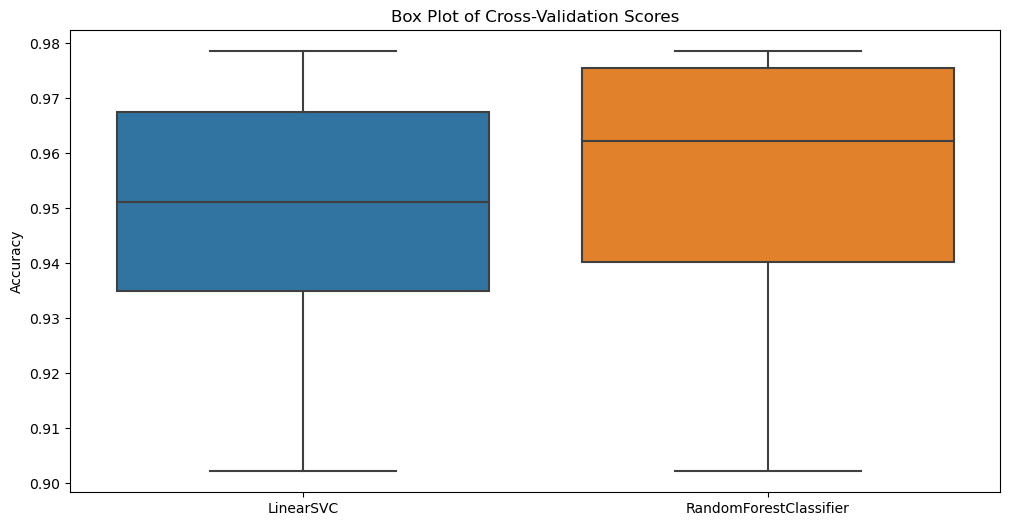

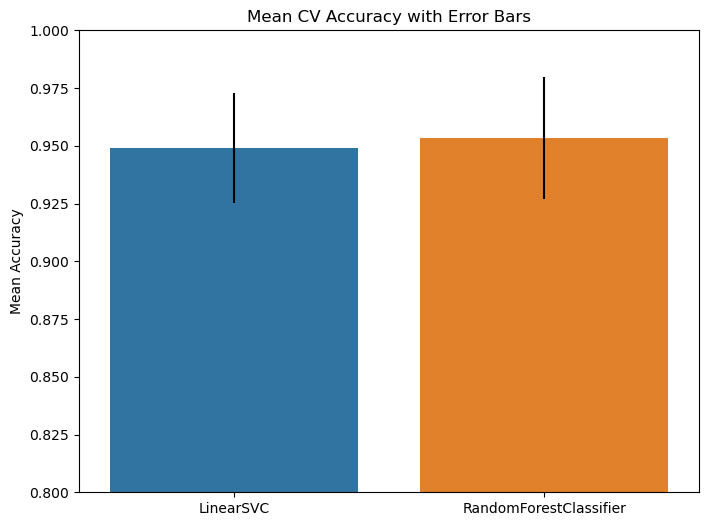

In [58]:
# Bar Plot for Mean CV Accuracy
labels = list(mean_scores.keys())
values = list(mean_scores.values())
errors = list(std_scores.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, yerr=errors, capsize=10)
plt.ylabel('Mean Accuracy')
plt.title('Mean CV Accuracy with Error Bars')
plt.ylim(0.8, 1)  
plt.show()


#### Observations

##### Mean CV Accuracy: Both models have high average accuracy scores. The RandomForestClassifier performs slightly better than LinearSVC by ~0.43%. This slight advantage can be of significance depending on the context and criticality of predictions.

##### Standard Deviation: The standard deviations are relatively low for both models, which means the models are consistent in their performance across different subsets of the data. It's noteworthy that RandomForest has a slightly higher deviation compared to LinearSVC. This means there's a bit more variability in the scores for RandomForest, but it's marginal.

##### Individual Cross-Validation Scores: From the individual CV scores, we can see that the accuracy for both models fluctuates between ~90% to ~98%. The models show robust performance across the board, with minor fluctuations.


##### Analysis of Misclassifications Using the Confusion Matrix

In [59]:
# Define a function to plot the confusion matrix with a flexible size
def plot_confusion_matrix(true_labels, predicted_labels, title, save_as_filename, fig_size=(8,5)):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=fig_size)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    
    # Save the figure before displaying it
    plt.savefig(save_as_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    

In [60]:
# Fit the models on the training data
best_svm_model.fit(X_train_scaled, y_train)
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

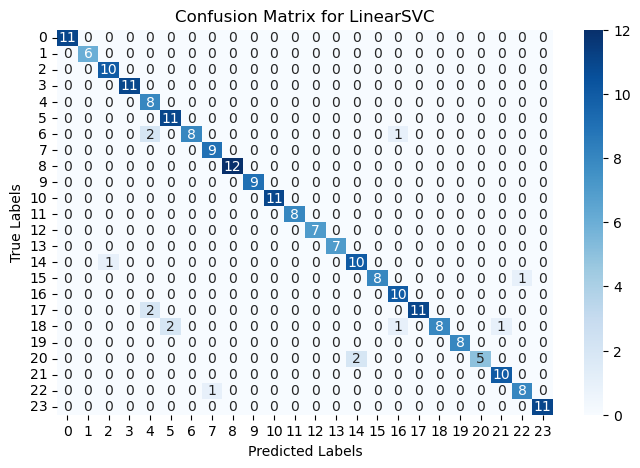

In [62]:
# Predict using the LinearSVC model
y_pred_svc = best_svm_model.predict(X_test_scaled)
plot_confusion_matrix(y_test, y_pred_svc, 'Confusion Matrix for LinearSVC', 'confusion_matrix_svc.png', fig_size=(8,5))


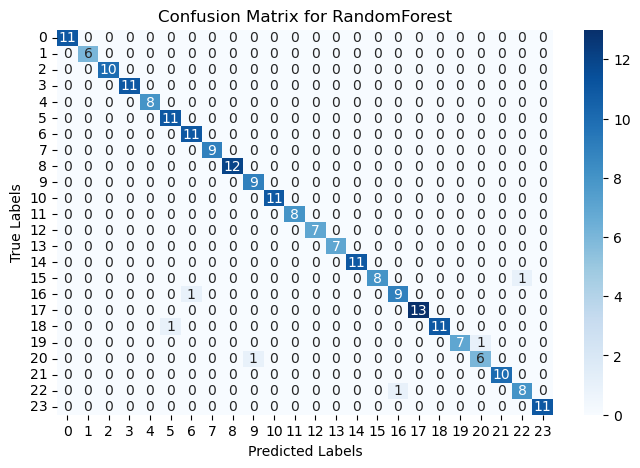

In [63]:
# Predict using the RandomForest model
y_pred_rf = best_rf_model.predict(X_test_scaled)
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix for RandomForest', 'confusion_matrix_rf.png', fig_size=(8,5))


#### Observations


##### The confusion matrices provide a visualization of the performances of both algorithms. Each column of the matrix represents the instances in the predicted class, while each row represents the instances in the actual class (true label).

##### The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are misclassified by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions. Both models have almost the same numbers.

##### The numbers outside the diagonal, the off-diagonal elements, represent misclassifications.From the confusion matrix for both models it can be observed that the LinearSVC Model has twice the number of misclassifications than the Random Forest Classifier. Also, in a few instances, the LinearSVC misclassified the same disease more than once while the Random Forest Classifier did not exceed 1 misclassification for any disease.


##### Analysis of Predicted Probabilities Using the Random Forest Classifier

In [41]:
# Obtain predicted probabilities for RandomForest
rf_probs = best_rf_model.predict_proba(X_test_scaled)


In [42]:
# Set up figure and axis for plotting
n_classes = rf_probs.shape[1]  # get number of classes
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

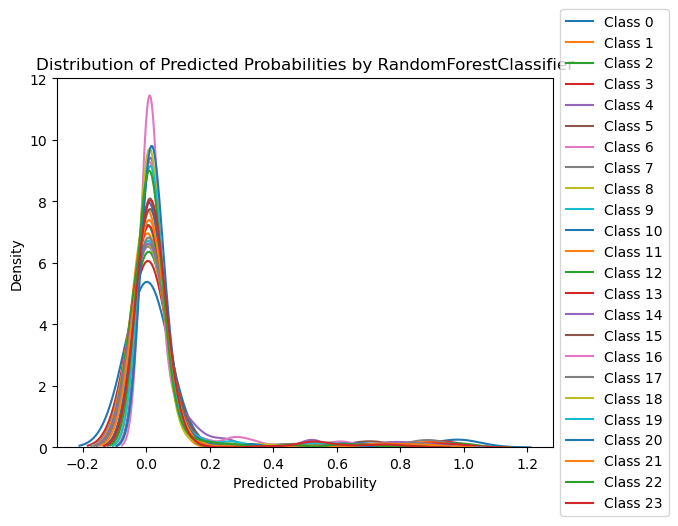

In [44]:
# Plot Distribution of Predicted Probabilities for Each Class:
for class_index in range(n_classes):
    sns.kdeplot(rf_probs[:, class_index], label=f"Class {class_index}")

# Customize Plot Distribution and Display Plot:
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities by RandomForestClassifier')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # move legend to the right

# Save the figure to a file before showing it
plt.savefig("probability_distribution.png", dpi=300, bbox_inches='tight')

plt.show()


#### Observations

##### The distribution of predicted probabilities for each class, as portrayed by the plot, reveals intriguing insights about my model. 

##### All the class probability distributions are prominently peaked at zero, implying a strong tendency of the model to be uncertain for a significant number of predictions. This is further evidenced by the overlapping flat curves from 0.2 to 1.2, suggesting a notable overlap in the model's confidence across multiple classes. 

##### Despite my model achieving an impressive 97% accuracy score, this visualization raises questions about the model's confidence in its predictions. Such findings emphasize the importance of delving deeper into model evaluations, beyond surface-level accuracy metrics.

##### Pairwise Top Two Class Probabilities Heatmap for RandomForest

In [26]:
# Get class probabilities from Random Forest model
probs_rf = best_rf_model.predict_proba(X_test_scaled)

# Initialize the pairwise matrix
num_classes = len(np.unique(y_train))
pairwise_matrix = np.zeros((num_classes, num_classes))

# Populate the pairwise matrix
for sample_probs in probs_rf:
    # Get indices of top 2 maximum probabilities
    top2_idx = sample_probs.argsort()[-2:][::-1]
    primary_class, secondary_class = top2_idx
    pairwise_matrix[primary_class, secondary_class] += 1
    

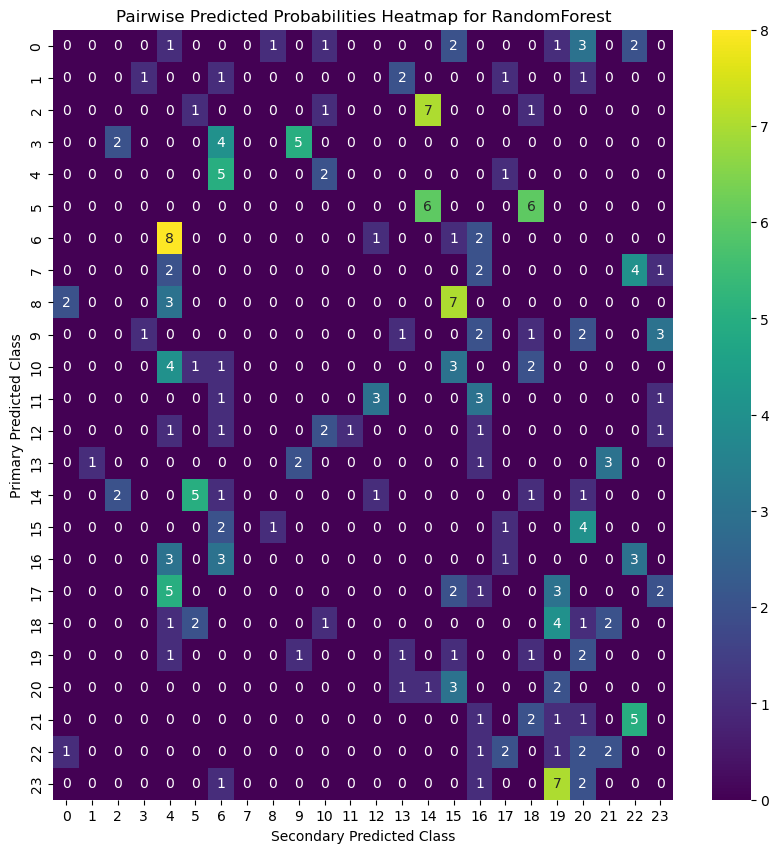

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pairwise_matrix, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Secondary Predicted Class')
plt.ylabel('Primary Predicted Class')
plt.title('Pairwise Predicted Probabilities Heatmap for RandomForest')

# Save the figure to a file
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


#### Observations

##### The heatmap illustrates the frequency with which the RandomForest model predicts a certain disease as the primary class and another as the secondary class, based on the predicted probabilities. 

##### The value inside each cell of the heatmap represents the number of times the Random Forest model predicted a certain disease as the primary class (highest predicted probability) and another as the secondary class (second-highest predicted probability). 
##### The color of each cell in the heatmap corresponds to the magnitude of this number, with brighter or more distinct colors typically indicating higher values (though the exact color scheme depends on the chosen colormap).

##### For example:
##### The model confuses the disease in class 6 (Dengue) with disease in classes 4 (Chicken Pox) with a value of 8. This means that instead of predicting Dengue, the model has predicted it as Chicken Pox 8 times. This could probably show that both diseases may share the same symptoms or description.

##### It is also worth noting the many zeros in the matrix, which indicates that for numerous disease pairs, there's no significant overlap in their descriptions, leading to clear classifications by the model.



#### Save model and Vectorizer

In [62]:
# Since the Random Forest Classifier has performed better, I will save it as my final model for deployment
import joblib

# Save the best model
joblib.dump(best_rf_model, 'rf_model.pkl')


['rf_model.pkl']

In [65]:
# Save the vectorizer
joblib.dump(vectorizer, 'count_vectorizer.pkl')


['count_vectorizer.pkl']

### **Conclusion**

##### 1. Objective & Data: The project set out to predict diseases using symptom descriptions. The dataset incorporated a collection of symptom narratives and their corresponding disease labels, setting the foundation for a supervised multi-class NLP task.

##### 2. Modeling & Results: Two algorithms, LinearSVC and RandomForest Classifier, were trained and evaluated using three different vectorizers: CountVectorizer, Word2Vec, and TF-IDF. The standout performer was the RandomForest model combined with CountVectorizer, achieving an impressive accuracy of 97%.

##### 3. Insights & Challenges: Despite this high accuracy, a closer inspection revealed some instances of misclassification. This indicates that certain irrelevant or overly frequent words in the symptom descriptions might be causing the models to confuse between certain diseases.

##### 4. Future Directions: Enhanced preprocessing steps, including the development of a custom word drop list, could potentially refine the model's accuracy, addressing the highlighted misclassification concerns.

##### 5. Significance: Achieving high precision in this task is paramount. Accurate disease predictions based on symptom descriptions can greatly aid in ensuring the right diagnoses and, consequently, effective treatments for patients.
